In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [2]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
fetch_housing_data()

In [4]:
housing = load_housing_data()

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

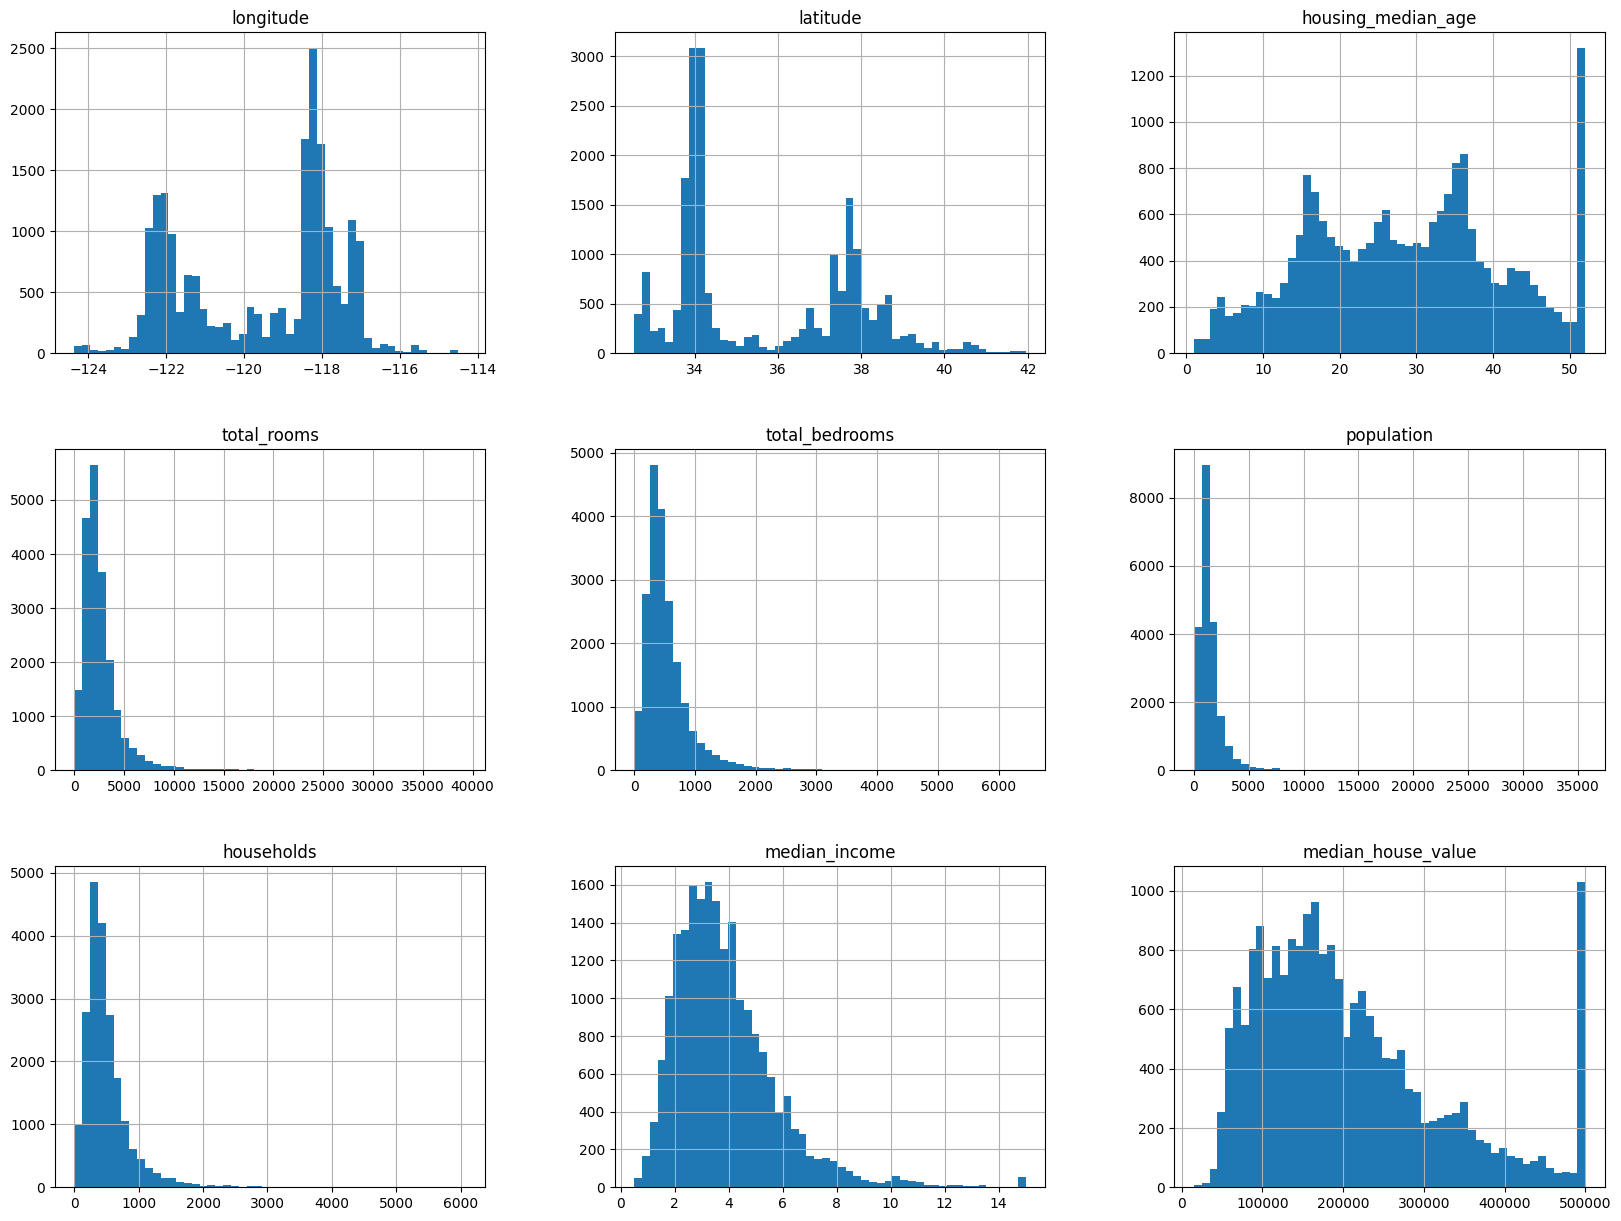

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)

    #test indices
    test_indices = shuffled_indices[:test_set_size]
    #train indices
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

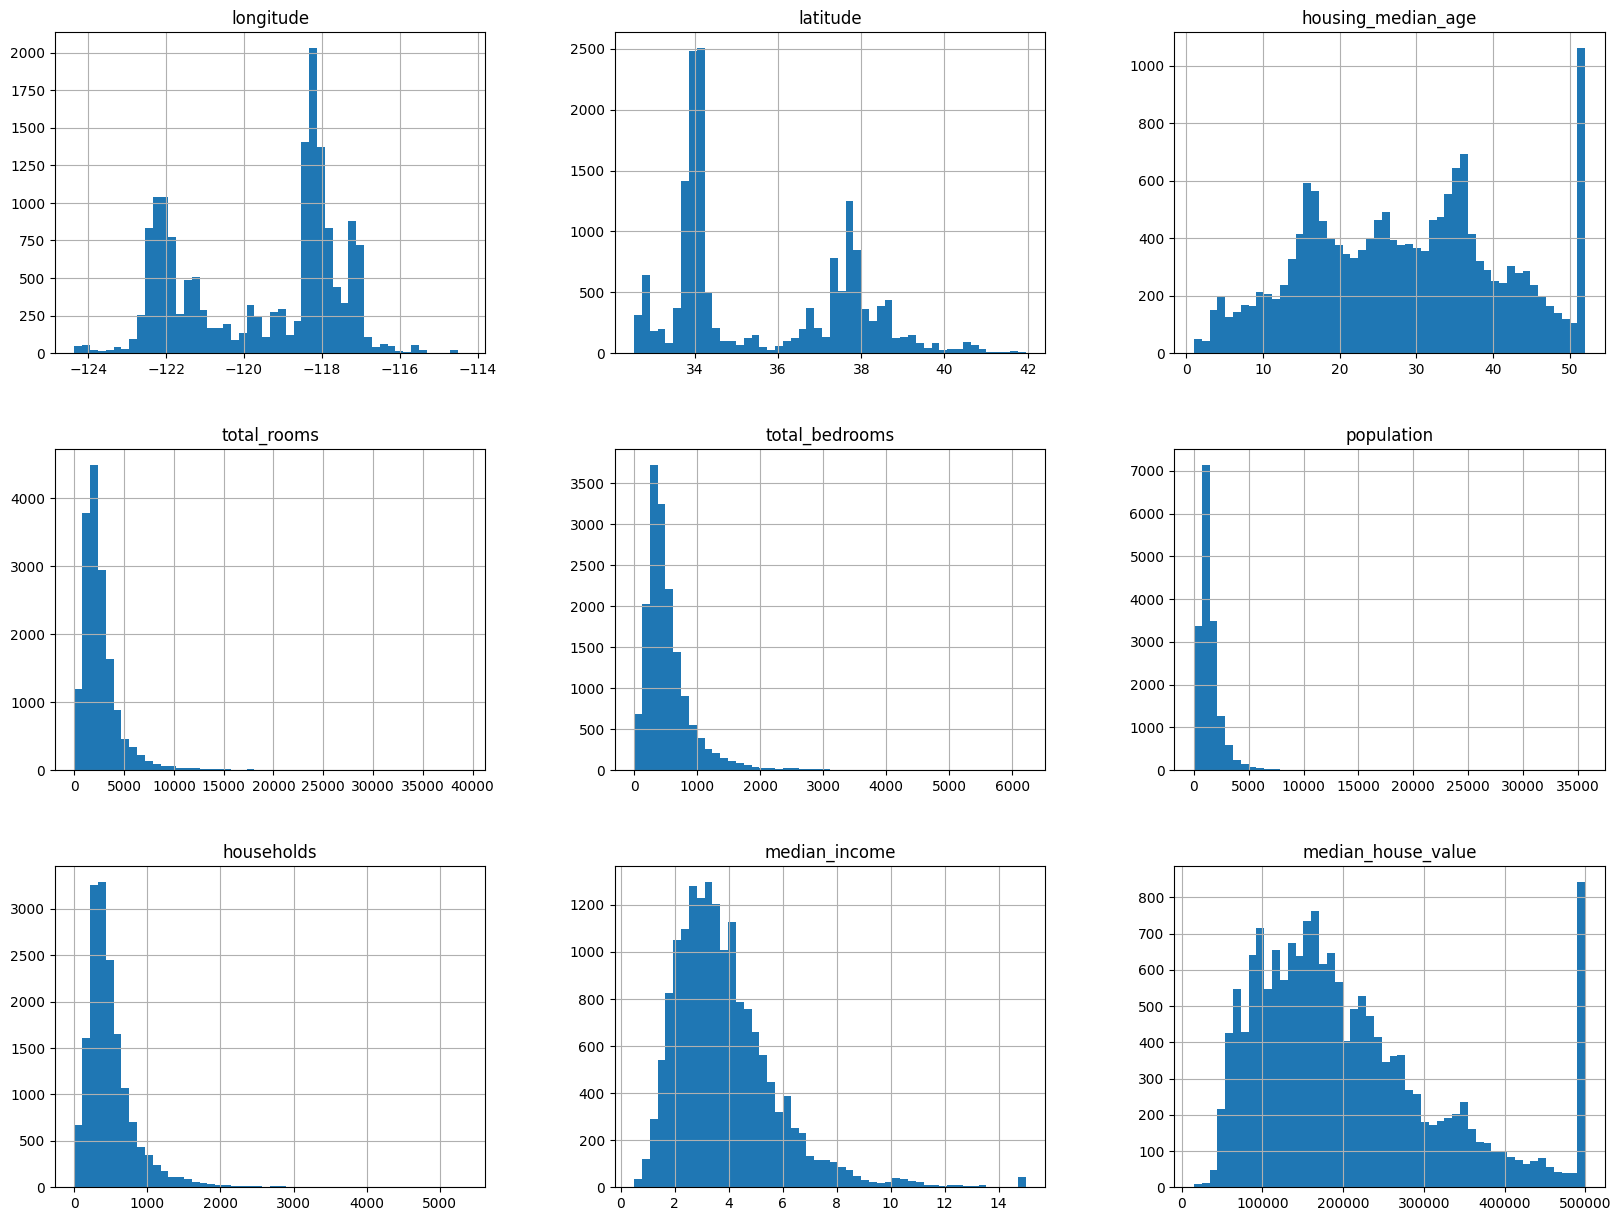

In [11]:
%matplotlib inline
train_set.hist(bins=50, figsize=(20,15))

In [12]:
print(len(test_set))

4128


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42 )

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

<Axes: >

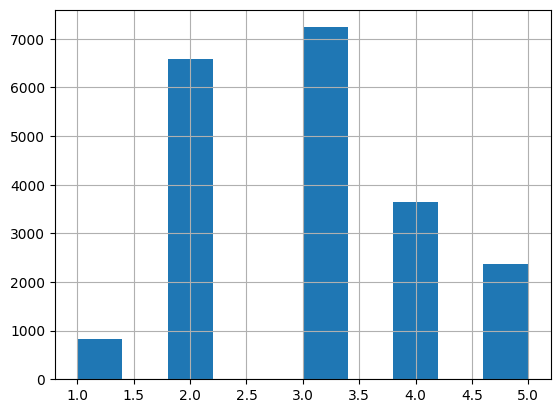

In [23]:
housing["income_cat"].hist()

In [25]:
#This particular stratified sampling is based off "income_cat"
for train_index, test_index in split.split(housing, housing["income_cat"]):
    stratified_train_set = housing.iloc[train_index]
    stratified_test_set = housing.iloc[test_index]

In [26]:
# Looking for proportions train set
stratified_train_set["income_cat"].value_counts() / len(stratified_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [27]:
# Looking for proportions test set
stratified_test_set["income_cat"].value_counts() / len(stratified_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [31]:
for set_ in (stratified_train_set, stratified_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: "['income_cat'] not found in axis"

In [32]:
housing_test = stratified_test_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

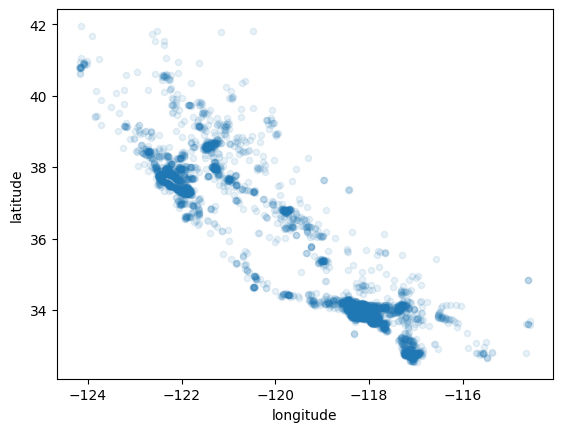

In [39]:
#Scatterplot to visualize & analyze the geographical data
housing_test.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#Looks like california :)

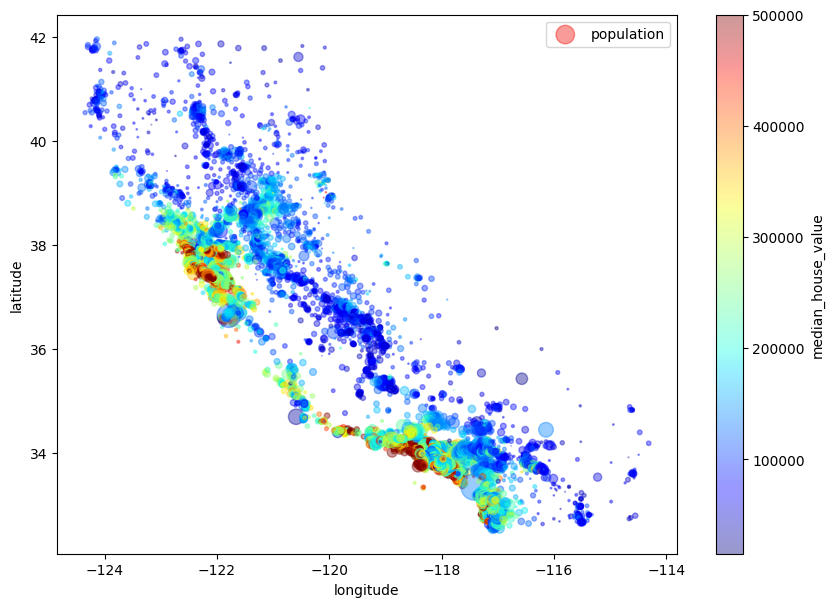

In [41]:
#Analyzing the housing prices
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            #Setting the size of the dot corresponding to the population there
            s = housing['population']/100, label='population', 
            figsize=(10,7),
            #Setting the color corresponding to the house value
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

In [38]:
# Closer to the ocean, more are the prices however, it doesn't apply to northern cali

In [45]:
correlation_matrix = housing_test.corr(numeric_only=True)
# Correlation matrix only calculates linear relation

In [48]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

In [49]:
# Can also use pandas scatter_matrix to compare one attribute against every other attr

In [50]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

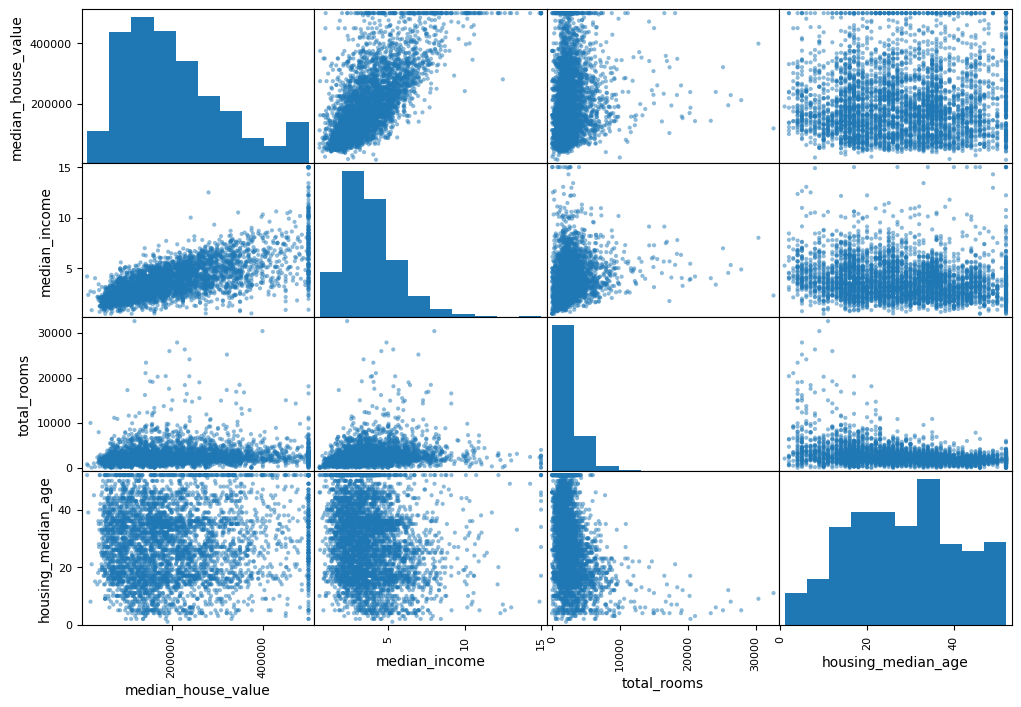

In [53]:
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing_test[attributes], figsize=(12, 8))


<Axes: xlabel='median_income', ylabel='median_house_value'>

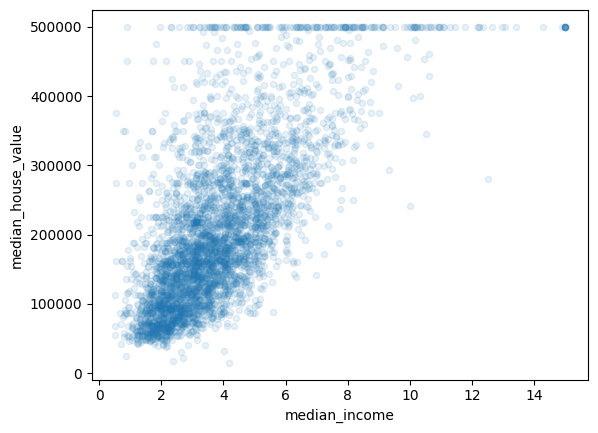

In [54]:
housing_test.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [55]:
#There are some horizontal lines around 300000 and 450000 which could be outliers that are needed to be removed

In [56]:
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [58]:
housing_test["rooms_per_household"] = housing_test["total_rooms"] / housing_test["households"]
housing_test["bedrooms_per_room"] = housing_test["total_bedrooms"]/housing_test["total_rooms"]
housing_test["population_per_household"]=housing_test["population"]/housing_test["households"]

In [59]:
correlation_matrix = housing_test.corr(numeric_only=True)
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

In [63]:
housing = stratified_train_set.drop("median_house_value", axis=1)
housing_labels = stratified_train_set["median_house_value"].copy()

In [64]:
# Handling missing data through pandas
# housing.dropna(subset=["total_bedrooms"])
# housing.drop("total_bedrooms", axis=1)
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

In [65]:
# Option 2 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Note, this can only be done on numerical attributes and so, need to create a copy of the data without the textual attribute

housing_num = housing.drop("ocean_proximity", axis=1)

In [66]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [68]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [70]:
X = imputer.transform(housing_num)
# Result is a numpy array, let's convert it into pandas

In [71]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [72]:
# Scikit Learn structure
'''
Estimators
Transformers
Predictors

'''

'\nEstimators\nTransformers\nPredictors\n\n'

In [78]:
#Handling categorical values
housing_category = housing[["ocean_proximity"]]
housing_category.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [79]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_category_encoded = ordinal_encoder.fit_transform(housing_category)

In [82]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [87]:
# There's an issue woth this representation 
# Model might think 1 is similar to 2 and so on
# Solution: Create one binary attribute per cat
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_category)
# This is a sci py sparse matrix that only stores the locations of non zero elements
housing_cat_1hot #.toarray() to convert this to numpy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [88]:
# Can write custom transformers page 98

In [89]:
# Feature Scaling
# min max scaling: scaling values between 0 and 1 ( high effect of outliers however used for ANNs)

# standardization: zero mean compression
# No specific range


In [96]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [97]:
# sklearn pipeline for sequential operations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [
        # All but the last should be transformers
        ('imputer', SimpleImputer(strategy='median')),
        ('attributes_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ]
)

In [98]:
# We handled numerical and non numerical data differently. now, we are going to handle the data in the same function

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])

In [99]:
housing_prepared = full_pipeline.fit_transform(housing)
